Olivia Folly-Gah

ID:1001818209

dataset: https://www.kaggle.com/datasets/kingabzpro/cosmetics-datasets?select=cosmetics.csv

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import os

In [ ]:
!mkdir pandas
!pwd

/content


In [ ]:
os.chdir("pandas")

In [ ]:
!pwd

/content/pandas


In [ ]:
!ls

cosmetics.csv


In [ ]:
df=pd.read_csv("cosmetics.csv")
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [ ]:
df.shape

(1472, 11)

In [ ]:
### Missing Values
na=df.isnull().sum()
na

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [ ]:
dups=df.duplicated().sum()
dups

0

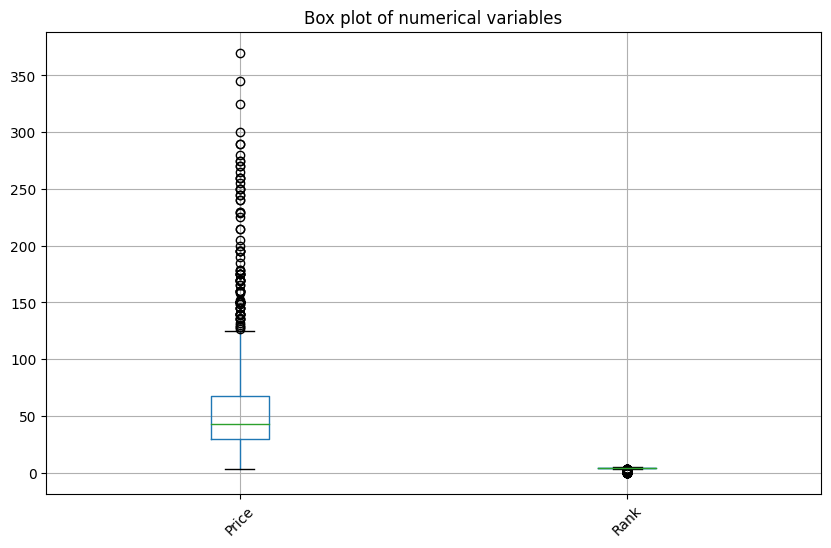

In [50]:
numerical_columns = ['Price', 'Rank']

plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Box plot of numerical variables')
plt.xticks(rotation=45)
plt.show()


##**Main Objective of the Project is:** Understanding How Cosmetic Product Features Affect Consumer Preferences and Ranking

In [ ]:
## To reduce outliers and make the data more accurate, gonna separate the products w/ the price... aka high  end vs regualr poor peasant prices

In [51]:
high_end_skincare = df[df['Price'] > 50]

average_price_high_end = high_end_skincare['Price'].mean()

print("Average price of high-end skincare products in Sephora: $", round(average_price_high_end, 2))


Average price of high-end skincare products in Sephora: $ 92.96


##### Make a separate dataset with the bougie and reg products

In [ ]:
## prob a bar graph of the price vs the brand and call it the high end brands


In [52]:
# Define the price thresholds
low_price_threshold = 50
high_price_threshold = 125

# Separate products based on price range
low_price_products = df[df['Price'] < low_price_threshold]
medium_price_products = df[(df['Price'] >= low_price_threshold) & (df['Price'] < high_price_threshold)]
high_price_products = df[df['Price'] >= high_price_threshold]

print("\nAffordable Products (Price < $50):")
print(low_price_products.head())

print("\nMid-range Products ($50 <= Price < $125):")
print(medium_price_products.head())

print("\nHigh-end Products (Price >= $125):")
print(high_price_products.head())



Affordable Products (Price < $50):
          Label               Brand  \
4   Moisturizer        IT COSMETICS   
8   Moisturizer  KIEHL'S SINCE 1851   
10  Moisturizer               FRESH   
11  Moisturizer  KIEHL'S SINCE 1851   
12  Moisturizer               BELIF   

                                             Name  Price  Rank  \
4   Your Skin But Better™ CC+™ Cream with SPF 50+     38   4.1   
8                              Ultra Facial Cream     29   4.4   
10               Lotus Youth Preserve Moisturizer     45   4.3   
11                  Midnight Recovery Concentrate     47   4.4   
12                       The True Cream Aqua Bomb     38   4.5   

                                          Ingredients  Combination  Dry  \
4   Water, Snail Secretion Filtrate, Phenyl Trimet...            1    1   
8   Water, Glycerin, Cyclohexasiloxane, Squalane, ...            1    1   
10  Water, Glycerin, Propylene Glycol Dicaprylate/...            0    0   
11  Caprylic/Capric Triglyceride

In [ ]:

# Divide the dataset into three price categories: 0-50, 50-125, 125+
low_price_products = df[df['Price'] < 50]
medium_price_products = df[(df['Price'] >= 50) & (df['Price'] < 125)]
high_price_products = df[df['Price'] >= 125]


In [53]:
all_ingredients = ' '.join(df['Ingredients'])

# Define common ingredient categories
ingredient_categories = {
    'Botanical Extracts': ['leaf extract', 'fruit extract', 'root extract', 'flower extract'],
    'Oils': ['seed oil', 'fruit oil', 'nut oil'],
    'Acids': ['hyaluronic acid', 'salicylic acid', 'glycolic acid'],
    'Vitamins': ['vitamin C', 'vitamin E', 'vitamin B5'],

}

ingredient_counts = {category: 0 for category in ingredient_categories}

for ingredient, count in ingredient_counts.items():
    for category, keywords in ingredient_categories.items():
        for keyword in keywords:
            if keyword in all_ingredients.lower():
                ingredient_counts[category] += 1

for category, count in ingredient_counts.items():
    print(f"{category}: {count}")


Botanical Extracts: 16
Oils: 12
Acids: 12
Vitamins: 0


In [54]:
X = low_price_products[['Price']]  # Features
y = low_price_products['Rank']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)


Mean Squared Error: 0.36629483717687694
Coefficients: [0.00078315]


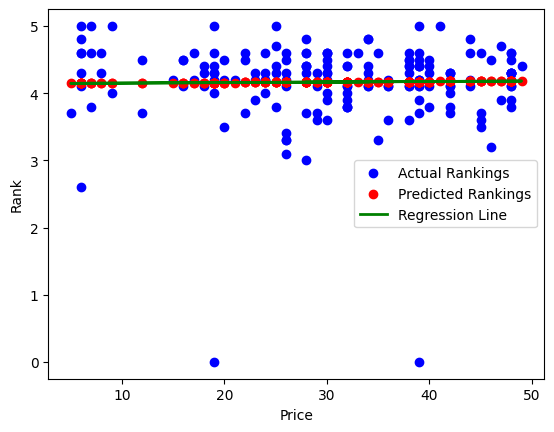

In [55]:
plt.scatter(X_test, y_test, color='blue', label='Actual Rankings')

plt.scatter(X_test, y_pred, color='red', label='Predicted Rankings')

plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel('Price')
plt.ylabel('Rank')

plt.legend()

plt.show()


medium end

In [56]:
X = medium_price_products[['Price']]
y = medium_price_products['Rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)


Mean Squared Error: 0.12989211721345292
Coefficients: [0.00118613]


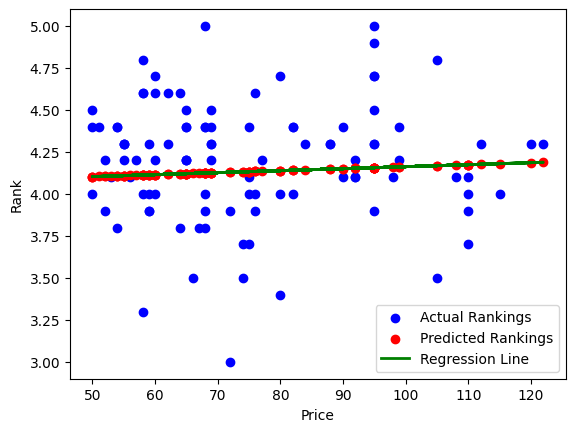

In [57]:
plt.scatter(X_test, y_test, color='blue', label='Actual Rankings')

plt.scatter(X_test, y_pred, color='red', label='Predicted Rankings')

plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel('Price')
plt.ylabel('Rank')

plt.legend()

plt.show()

High end

In [58]:
X = high_price_products[['Price']]
y = high_price_products['Rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)


Mean Squared Error: 1.166742200039812
Coefficients: [1.42444966e-06]


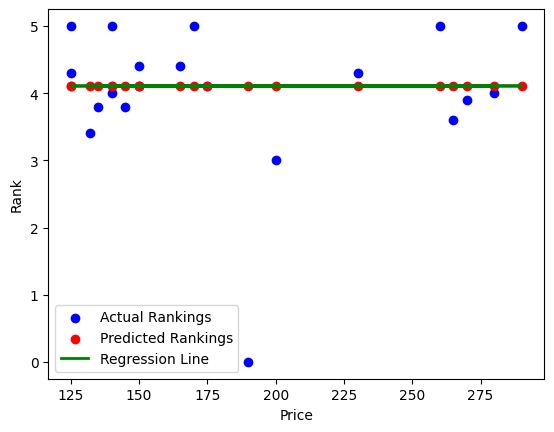

In [59]:
plt.scatter(X_test, y_test, color='blue', label='Actual Rankings')

plt.scatter(X_test, y_pred, color='red', label='Predicted Rankings')

plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel('Price')
plt.ylabel('Rank')

plt.legend()

plt.show()

Feature Selection for the affordable products:


In [ ]:
# Separate features and target variable
X = low_price_products.drop(columns=['Rank'])  # Features
y = low_price_products['Rank']  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop_first=True to avoid multicollinearity

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=3)  # Select top 3 features
X_selected = selector.fit_transform(X_encoded, y)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_encoded.columns[selected_feature_indices]

print("Selected features:", selected_feature_names)


Selected features: Index(['Label_Eye cream',
       'Ingredients_Water, Sodium Trideceth Sulfate, Disodium Lauroamphodiacetate, Acrylates Copolymer, Polysorbate 20, Sodium C14-16 Olefin Sulfonate, Glycerin, Cocamidopropyl Betaine, Isopropyl Alcohol, Sodium Sulfate, Limnanthes Alba (Meadowfoam) Seed Oil, Aniba Rosaeodora (Rosewood) Wood Oil, Pelargonium Graveolens Flower Oil, Bulnesia Sarmientoi Wood Oil, Cymbopogon Martini Oil, Rosa Centifolia Flower Oil, Amyris Balsamifera Bark Oil, Santalum Album (Sandalwood) Oil, Salvia Sclarea (Clary) Oil, Ormenis Multicaulis Oil, Acacia Dealbata Flower/Stem Extract, Daucus Carota Sativa (Carrot) Seed Oil, Piper Nigrum (Pepper) Fruit Oil, Disteareth-75 Ipdi, Glycereth-7 Caprylate/Caprate, Potassium Chloride, Hydrogen Peroxide, Magnesium Nitrate, Magnesium Chloride, Sodium Benzotriazolyl Butylphenol Sulfonate, Buteth-3, Tributyl Citrate, Sodium Hydroxide, Sodium Chloride, Disodium Edta, Citric Acid, Linalool, Methylchloroisothiazolinone, Methylisoth

In [ ]:
# Define the columns to compare with 'Ranking'
columns_to_compare = columns_to_compare = ['Price', 'Label', 'Brand', 'Ingredients']

# Set up the plotting environment
fig, axes = plt.subplots(len(columns_to_compare), 2, figsize=(15, 6*len(columns_to_compare)))
fig.subplots_adjust(hspace=1.0)

# Iterate over each column and create plots
for i, column in enumerate(columns_to_compare):
    # Bar plot
    sns.barplot(data=low_price_products, x=column, y='Rank', ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar plot of Ranking vs {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Ranking')

    # Box plot
    sns.boxplot(data=low_price_products, x=column, y='Rank', ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of Ranking vs {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Ranking')

plt.show()

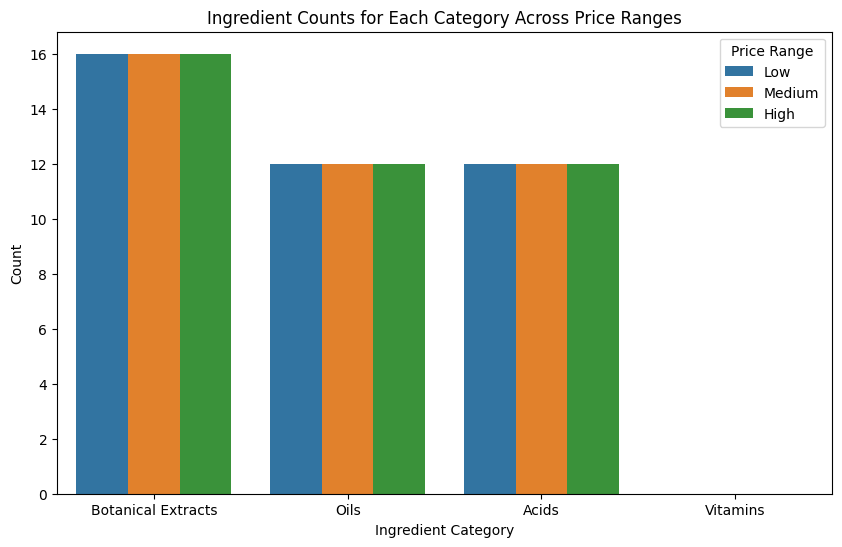

In [60]:
# Reshape the data to include ingredient counts for each category across price ranges
ingredient_data = []
for category, count in ingredient_counts.items():
    for price_range, products in zip(['Low', 'Medium', 'High'], [low_price_products, medium_price_products, high_price_products]):
        ingredient_data.append({'Ingredient Category': category, 'Price Range': price_range, 'Count': count})

ingredient_df = pd.DataFrame(ingredient_data)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot ingredient counts for each category across price ranges
sns.barplot(x='Ingredient Category', y='Count', hue='Price Range', data=ingredient_df, ax=ax)
ax.set_title('Ingredient Counts for Each Category Across Price Ranges')
ax.set_xlabel('Ingredient Category')
ax.set_ylabel('Count')
ax.legend(title='Price Range')

plt.show()


In [61]:
columns_to_compare = ['Price', 'Label', 'Brand', 'Ingredients']

fig, axes = plt.subplots(len(columns_to_compare) + 1, 2, figsize=(15, 6*(len(columns_to_compare) + 1)))
fig.subplots_adjust(hspace=1.0)


for i, column in enumerate(columns_to_compare):
    sns.barplot(data=low_price_products, x=column, y='Rank', ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar plot of Ranking vs {column} (Price < 50)')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Ranking')

    sns.boxplot(data=low_price_products, x=column, y='Rank', ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of Ranking vs {column} (Price < 50)')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Ranking')

sns.barplot(x=list(ingredient_counts.keys()), y=list(ingredient_counts.values()), ax=axes[len(columns_to_compare), 0])
axes[len(columns_to_compare), 0].set_title('Ingredient Counts for Each Category')
axes[len(columns_to_compare), 0].set_xlabel('Ingredient Category')
axes[len(columns_to_compare), 0].set_ylabel('Count')

ingredient_data = []
for category, count in ingredient_counts.items():
    for price_range, products in zip(['Low', 'Medium', 'High'], [low_price_products, medium_price_products, high_price_products]):
        ingredient_data.append({'Ingredient Category': category, 'Price Range': price_range, 'Count': count})

ingredient_df = pd.DataFrame(ingredient_data)

sns.barplot(x='Ingredient Category', y='Count', hue='Price Range', data=ingredient_df, ax=axes[len(columns_to_compare), 1])
axes[len(columns_to_compare), 1].set_title('Ingredient Counts for Each Category Across Price Ranges')
axes[len(columns_to_compare), 1].set_xlabel('Ingredient Category')
axes[len(columns_to_compare), 1].set_ylabel('Count')
axes[len(columns_to_compare), 1].legend(title='Price Range')

plt.show()


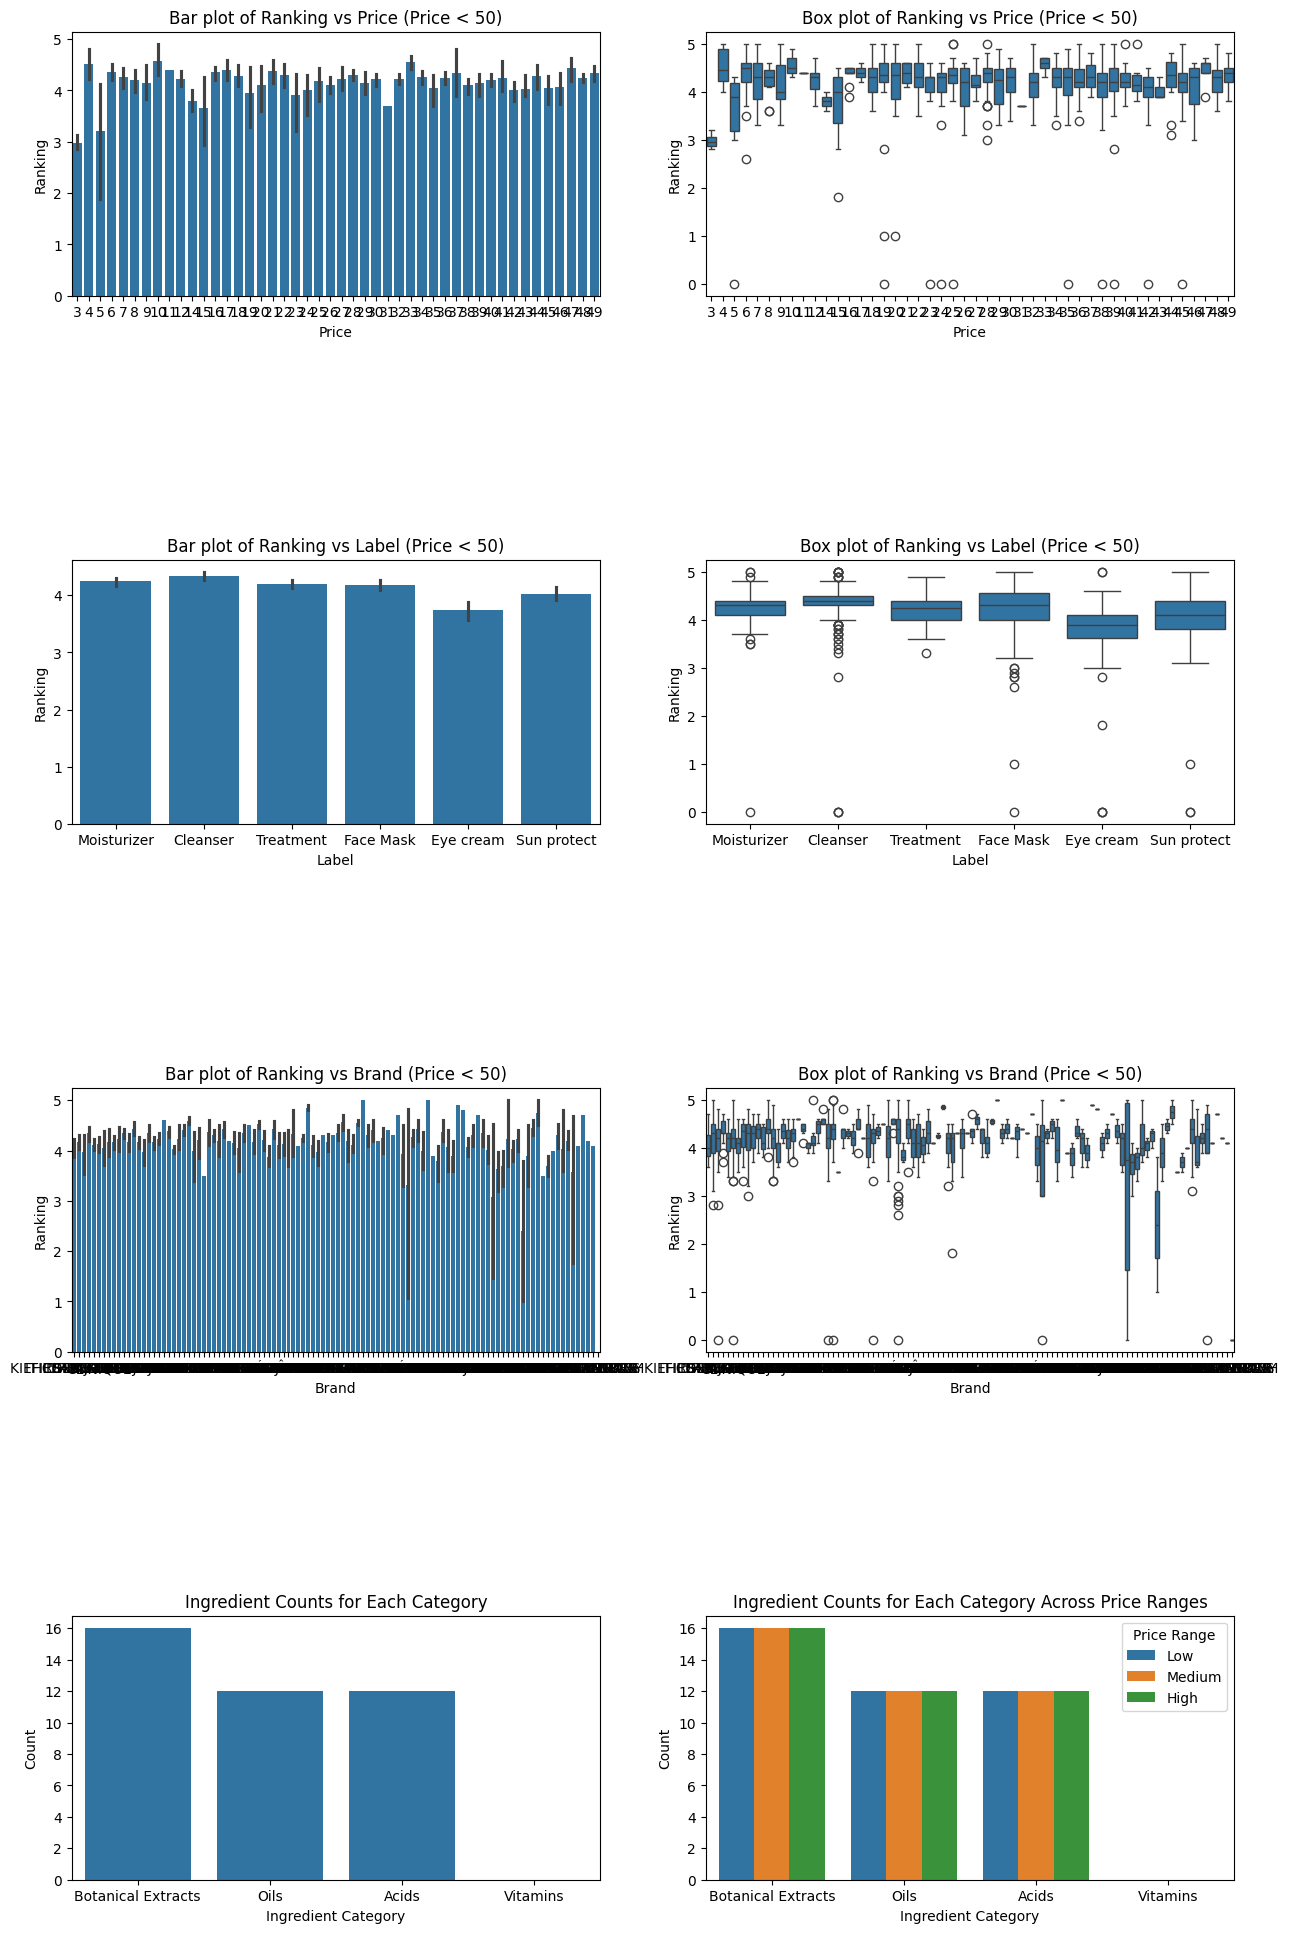

In [ ]:
# Define the columns to compare with 'Ranking'
columns_to_compare = ['Price', 'Label', 'Brand']

# Set up the plotting environment
fig, axes = plt.subplots(len(columns_to_compare) + 1, 2, figsize=(15, 6*(len(columns_to_compare) + 1)))
fig.subplots_adjust(hspace=1.0)

# Iterate over each column and create plots
for i, column in enumerate(columns_to_compare):
    # Bar plot for low price products
    sns.barplot(data=low_price_products, x=column, y='Rank', ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar plot of Ranking vs {column} (Price < 50)')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Ranking')

    # Box plot for low price products
    sns.boxplot(data=low_price_products, x=column, y='Rank', ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of Ranking vs {column} (Price < 50)')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Ranking')

# Plot ingredient counts for each category across price ranges
sns.barplot(x=list(ingredient_counts.keys()), y=list(ingredient_counts.values()), ax=axes[len(columns_to_compare), 0])
axes[len(columns_to_compare), 0].set_title('Ingredient Counts for Each Category')
axes[len(columns_to_compare), 0].set_xlabel('Ingredient Category')
axes[len(columns_to_compare), 0].set_ylabel('Count')

# Reshape the data to include ingredient counts for each category across price ranges
ingredient_data = []
for category, count in ingredient_counts.items():
    for price_range, products in zip(['Low', 'Medium', 'High'], [low_price_products, medium_price_products, high_price_products]):
        ingredient_data.append({'Ingredient Category': category, 'Price Range': price_range, 'Count': count})

# Create a DataFrame from the reshaped data
ingredient_df = pd.DataFrame(ingredient_data)

# Plot ingredient counts for each category across price ranges
sns.barplot(x='Ingredient Category', y='Count', hue='Price Range', data=ingredient_df, ax=axes[len(columns_to_compare), 1])
axes[len(columns_to_compare), 1].set_title('Ingredient Counts for Each Category Across Price Ranges')
axes[len(columns_to_compare), 1].set_xlabel('Ingredient Category')
axes[len(columns_to_compare), 1].set_ylabel('Count')
axes[len(columns_to_compare), 1].legend(title='Price Range')

plt.show()


###1.) Price vs. Ranking

In [ ]:
### is quality determined by quantity (aka price)

###2.) Brand vs Ranking

In [ ]:
### is it the bias and reputation based on the name of the brand or actual product, does it also justify the price in some cases

##3.) Ingredients vs Rank

In [ ]:
### checking if the customers prefer certain ingredients in their products ; hard to compare price due to not know the lab practices of obtaining said product and the actual formulation process

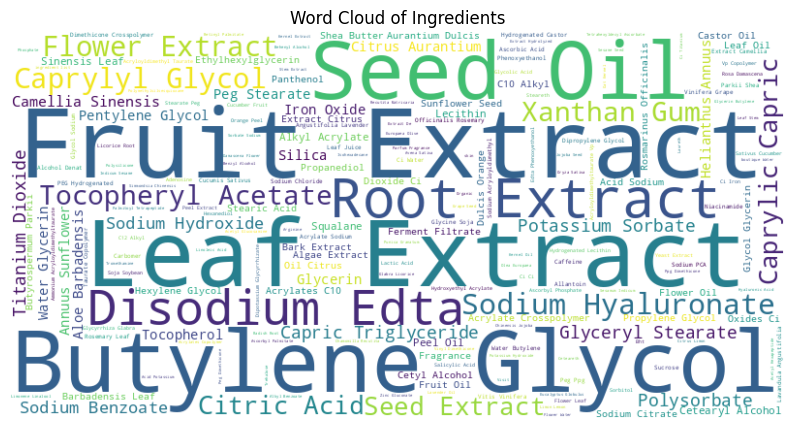

In [62]:
from wordcloud import WordCloud

all_ingredients = ' '.join(df['Ingredients'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Ingredients')
plt.axis('off')
plt.show()


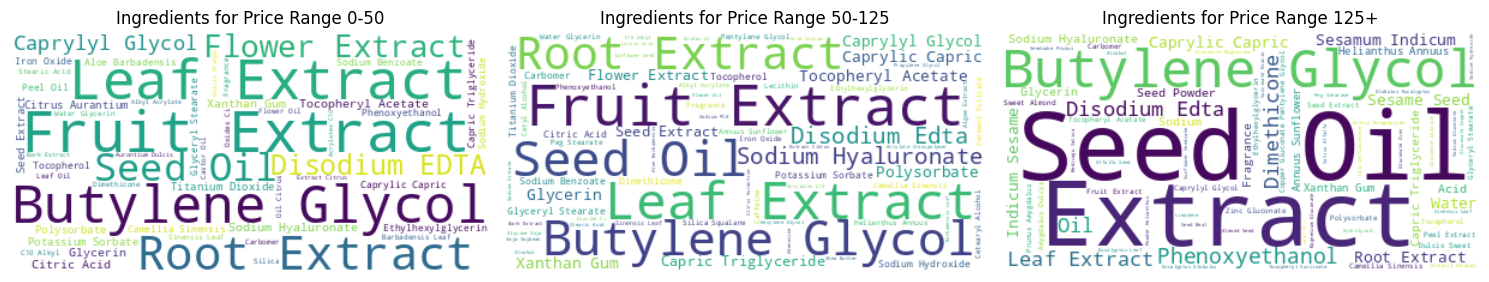

In [63]:
# Divide the dataset into three price categories: 0-50, 50-125, 125+
low_price_products = df[df['Price'] < 50]
medium_price_products = df[(df['Price'] >= 50) & (df['Price'] < 125)]
high_price_products = df[df['Price'] >= 125]

# Concatenate ingredients for each price category
low_ingredients = ' '.join(low_price_products['Ingredients'])
medium_ingredients = ' '.join(medium_price_products['Ingredients'])
high_ingredients = ' '.join(high_price_products['Ingredients'])

# Create WordClouds for each price category
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
wordcloud_low = WordCloud(width=400, height=200, background_color='white').generate(low_ingredients)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title('Ingredients for Price Range 0-50')
plt.axis('off')

plt.subplot(1, 3, 2)
wordcloud_medium = WordCloud(width=400, height=200, background_color='white').generate(medium_ingredients)
plt.imshow(wordcloud_medium, interpolation='bilinear')
plt.title('Ingredients for Price Range 50-125')
plt.axis('off')

plt.subplot(1, 3, 3)
wordcloud_high = WordCloud(width=400, height=200, background_color='white').generate(high_ingredients)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title('Ingredients for Price Range 125+')
plt.axis('off')

plt.tight_layout()
plt.show()


grouping within ingredients column

In [ ]:
# Extract all unique ingredient names from the 'Ingredients' column
unique_ingredients = set()
#for ingredients in df['Ingredients']:
   # ingredients_list = ingredients.split(', ')  # Assuming ingredients are separated by comma and space
   # unique_ingredients.update(ingredients_list)

# Print all unique ingredient names
#for ingredient in unique_ingredients:
   # print(ingredient)


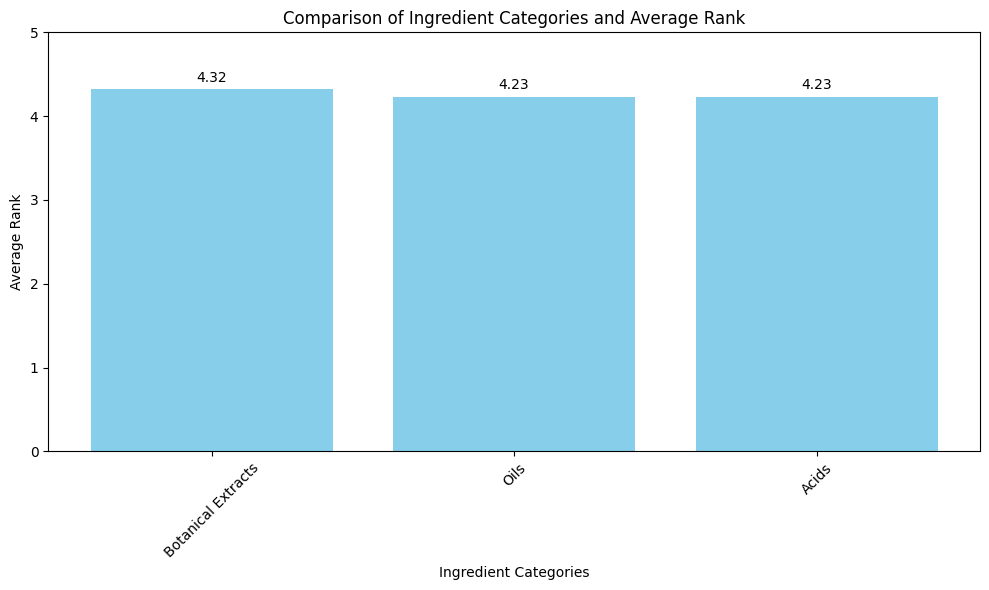

In [64]:
ingredient_counts = {
    'Botanical Extracts': 16,
    'Oils': 12,
    'Acids': 12,
    'Vitamins': 0
}

category_ranks = {}
for category, count in ingredient_counts.items():
    category_data = df.sample(n=count, random_state=42)
    category_rank = category_data['Rank'].mean()
    category_ranks[category] = min(category_rank, 5)

categories = list(category_ranks.keys())
ranks = list(category_ranks.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, ranks, color='skyblue')

for bar, rank in zip(bars, ranks):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{rank:.2f}', ha='center', va='bottom')

plt.xlabel('Ingredient Categories')
plt.ylabel('Average Rank')
plt.title('Comparison of Ingredient Categories and Average Rank')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
